In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.optimize import curve_fit

In [2]:
def gauss(x, sigma, mu, amp):
    return amp * np.exp(-np.power((x - mu) / sigma, 2) / 2) / (sigma * np.sqrt(2 * np.pi))
def cauchy(x, gamma, mu, amp):
    return gamma / (np.pi * (np.power(x - mu, 2) + gamma**2)) 

__Нахождение добротности контура__

[ 0.52172669 10.04981449  1.55691291]
Q = 11.648


Text(0.5, 1.0, 'АЧХ колебательного контура без стабилизации частоты')

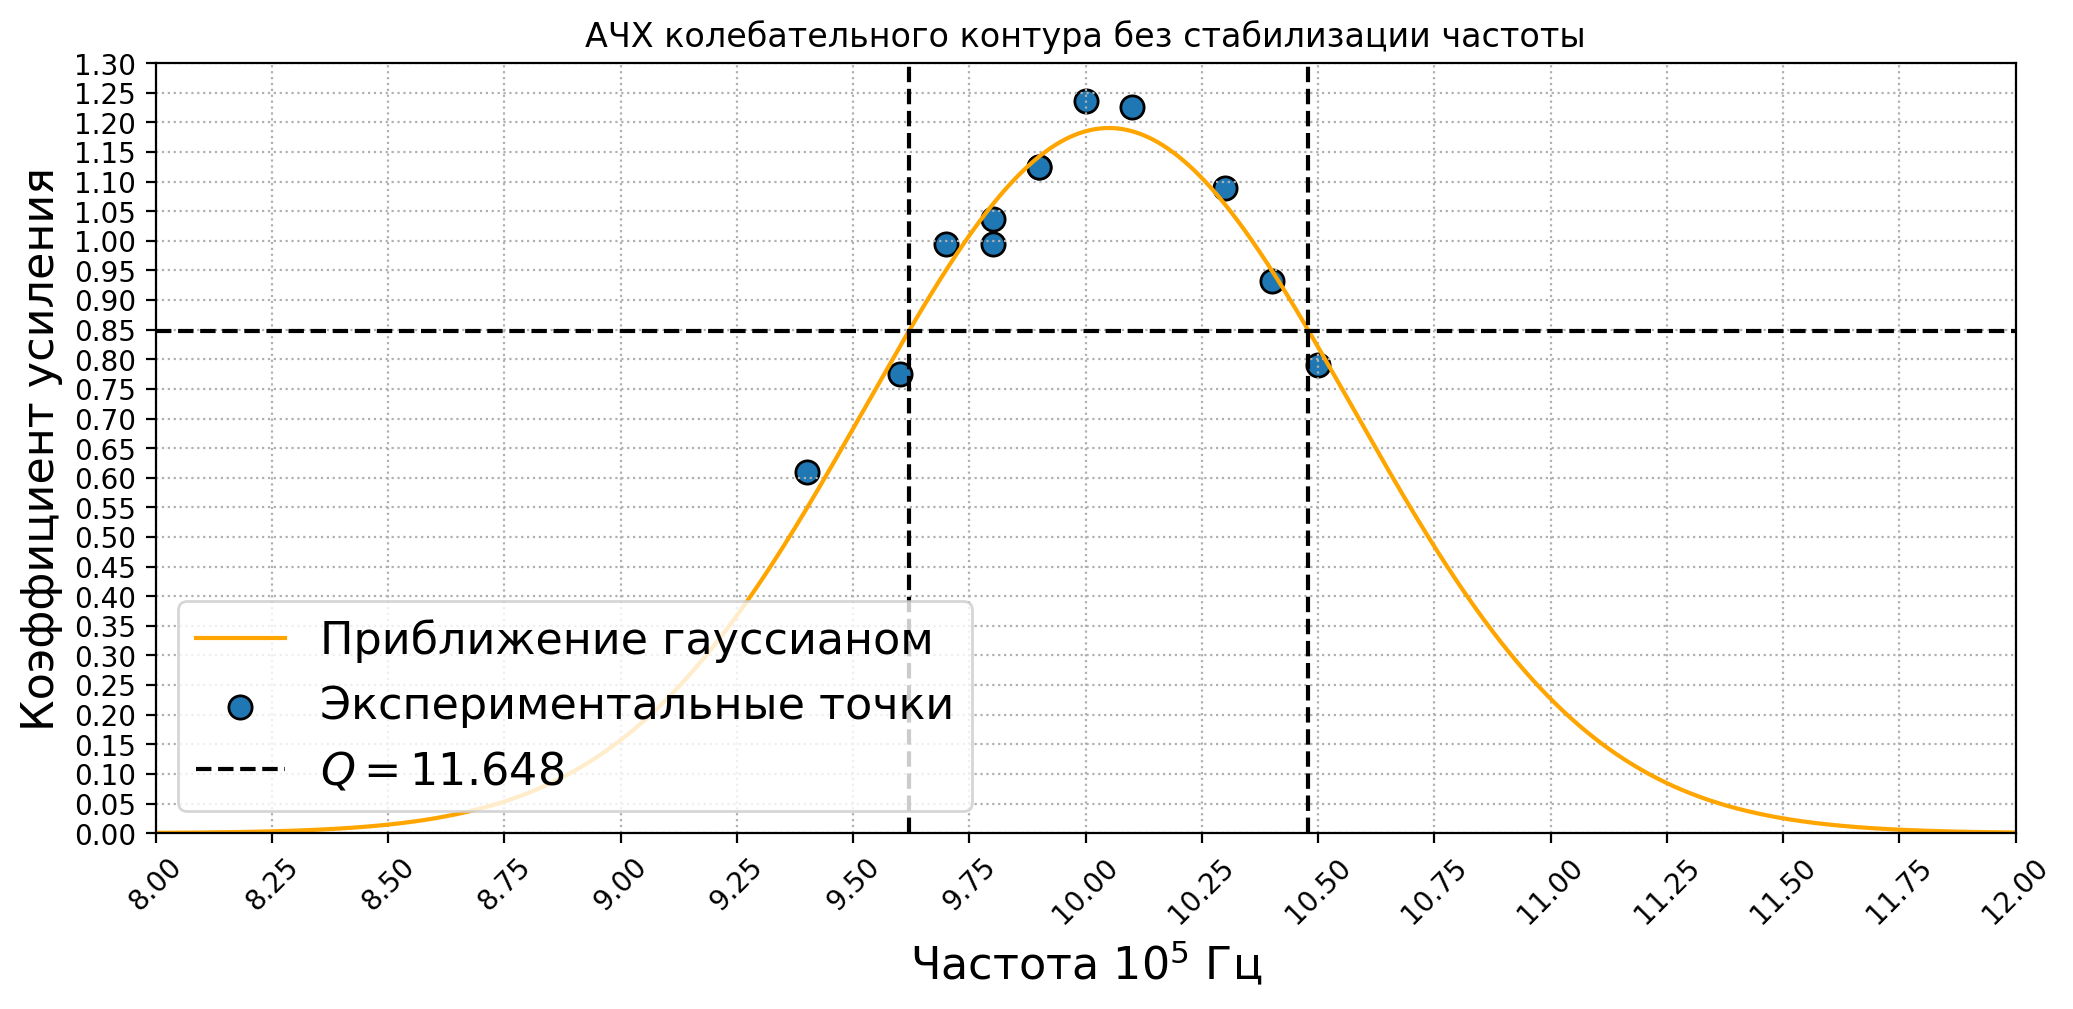

In [35]:
Uin = 415
data = pd.read_csv("afr.csv")
plt.figure(figsize = (12, 5), dpi = 200)

k_dots = data['Uout[mV]'].to_numpy() / Uin
freq_dots = data['freq[100kHz]'].to_numpy()
x_line = np.linspace(8, 12, 10000)
param, _ = curve_fit(gauss, freq_dots, k_dots, p0 = [1, 10, 2])
print(param)
plt.plot(x_line, gauss(x_line, *param), color = 'orange', label = 'Приближение гауссианом')
plt.scatter(freq_dots, k_dots, s = 70, edgecolors='black', label = 'Экспериментальные точки')
plt.grid(ls = ':')

left_freq = x_line[np.argmin(np.abs(gauss(x_line, *param)[x_line < 10] - 1.2 / np.sqrt(2)))]
right_freq = x_line[x_line > 10][np.argmin(np.abs(gauss(x_line[x_line > 10], *param) - 1.2 / np.sqrt(2)))]
plt.axvline(left_freq,
            color = 'black',
            linestyle = '--')
Q = 10 / (right_freq - left_freq)
plt.axvline(right_freq,
            color = 'black',
            linestyle = '--',
            label = f'$Q =  {Q:.3f}$')


plt.legend(fontsize = 16,
           loc = 'lower left')

plt.axhline(1.2 / np.sqrt(2),
            linestyle = '--',
            color = 'black')

print(f"Q = {Q:.3f}")
plt.xticks(np.arange(7, 13, 0.25), rotation = 45)
plt.xlim(8, 12)
plt.yticks(np.arange(0, 1.5, 0.05))
plt.ylim(0, 1.3)
plt.xlabel('Частота $10^5$ Гц', fontsize = 16)
plt.ylabel("Коэффициент усиления", fontsize = 16)
plt.title("АЧХ колебательного контура без стабилизации частоты")

__Нахождение добротности кварцевого резонатора__

In [45]:
#изменение частоты при добавлении конденсатора с малой ёмкостью
delta_f_k = 7 #Гц
delta_f = 17523 #Гц

Q_k = Q * delta_f / delta_f_k
print(Q_k)

29159.312508321163


### Зависимость частоты от напряжения питания

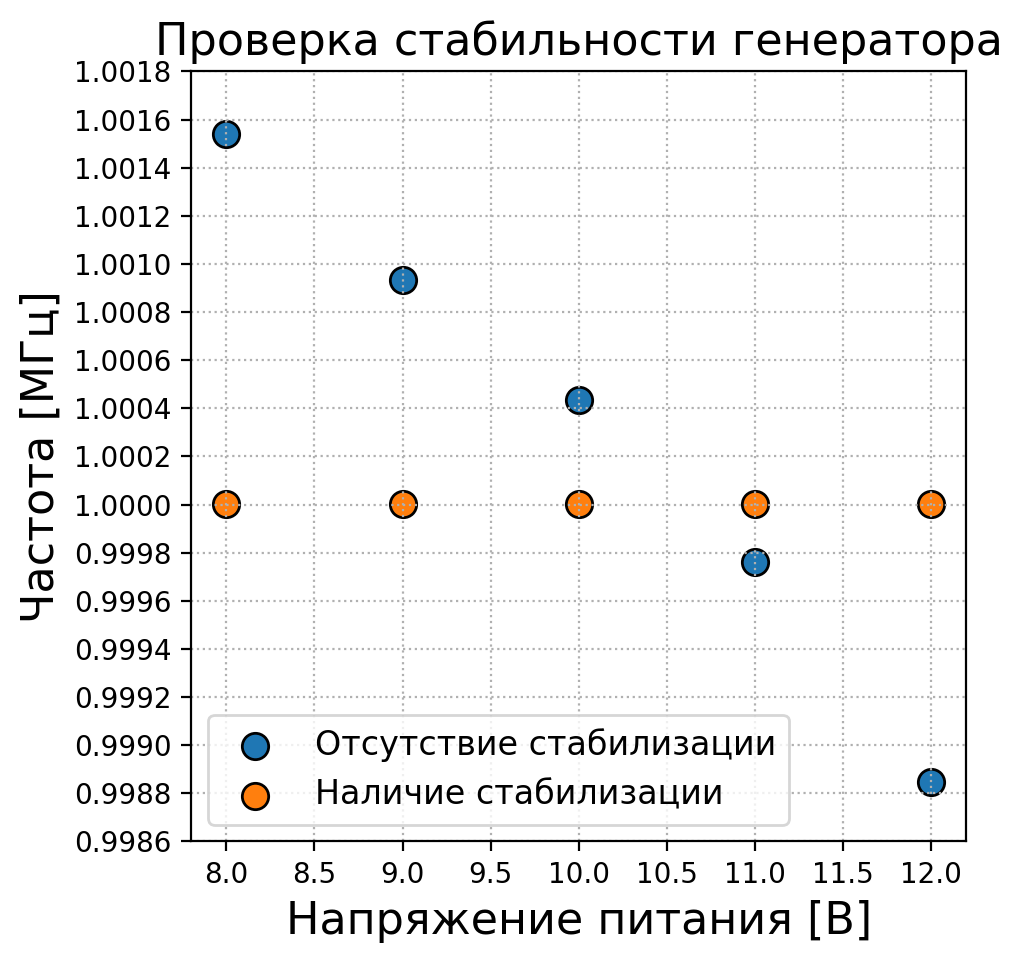

In [25]:
data_1 = pd.read_csv('freq_by_volt_1.csv')
data = pd.read_csv("freq_by_volt.csv")
plt.figure(figsize = (5, 5), dpi = 200)
plt.scatter(data.volt, 
            data.freq, 
            s = 90, 
            edgecolors='black',
            label = 'Отсутствие стабилизации')
plt.scatter(data_1.volt, 
            data_1.freq, 
            s = 90, 
            edgecolors='black',
            label = 'Наличие стабилизации')
plt.yticks(np.arange(0.986, 1.0020, 0.0002))
plt.ylim(0.9986, 1.0018)
plt.xlabel("Напряжение питания [В]", fontsize = 16)
plt.ylabel("Частота [МГц]", fontsize = 16)
plt.grid(ls = ':')
plt.title("Проверка стабильности генератора", fontsize = 16)
plt.legend(fontsize = 12, loc = 'lower left')

### Определение параметров кварцевого резонатора